In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
def deprecated_function():
  warnings.warn("This function is deprecated and will be removed in a future version.", DeprecationWarning)
#warnings.warn = deprecated_function

In [ ]:
data = pd.read_csv("/content/traffic.csv")

In [ ]:
data.head(5)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
data.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [ ]:
data.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
data.shape

(48120, 4)

In [ ]:
data.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
numeric_cols = data.select_dtypes(include = "int")
numeric_cols.corr()

,Junction,Vehicles,ID
Junction,1.000000,-0.613787,0.221876
Vehicles,-0.613787,1.000000,0.227974
ID,0.221876,0.227974,1.000000


In [ ]:
data["DateTime"] = pd.to_datetime(data["DateTime"])

In [ ]:
data.dtypes

DateTime    datetime64[ns]
Junction             int64
Vehicles             int64
ID                   int64
dtype: object

##Feature Construction

Monday = 0
Tuesday = 1
Wednesday = 2
Thursday = 3
Friday = 4
Saturday = 5
Sunday = 6

In [ ]:
data["day"] = data['DateTime'].dt.day
data["month"] = data['DateTime'].dt.month
data["year"] = data['DateTime'].dt.year
data["time"] = data["DateTime"].dt.time
data['weekday'] = data['DateTime'].dt.weekday

In [ ]:
data

,DateTime,Junction,Vehicles,ID,day,month,year,time,weekday
0,2015-11-01 00:00:00,1,15,20151101001,1,11,2015,00:00:00,6
1,2015-11-01 01:00:00,1,13,20151101011,1,11,2015,01:00:00,6
2,2015-11-01 02:00:00,1,10,20151101021,1,11,2015,02:00:00,6
3,2015-11-01 03:00:00,1,7,20151101031,1,11,2015,03:00:00,6
4,2015-11-01 04:00:00,1,9,20151101041,1,11,2015,04:00:00,6
...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,30,6,2017,19:00:00,4
48116,2017-06-30 20:00:00,4,30,20170630204,30,6,2017,20:00:00,4
48117,2017-06-30 21:00:00,4,16,20170630214,30,6,2017,21:00:00,4
48118,2017-06-30 22:00:00,4,22,20170630224,30,6,2017,22:00:00,4


In [ ]:
data =data.drop("DateTime", axis=1)

In [ ]:
data

,Junction,Vehicles,ID,day,month,year,time,weekday
0,1,15,20151101001,1,11,2015,00:00:00,6
1,1,13,20151101011,1,11,2015,01:00:00,6
2,1,10,20151101021,1,11,2015,02:00:00,6
3,1,7,20151101031,1,11,2015,03:00:00,6
4,1,9,20151101041,1,11,2015,04:00:00,6
...,...,...,...,...,...,...,...,...
48115,4,11,20170630194,30,6,2017,19:00:00,4
48116,4,30,20170630204,30,6,2017,20:00:00,4
48117,4,16,20170630214,30,6,2017,21:00:00,4
48118,4,22,20170630224,30,6,2017,22:00:00,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Junction  48120 non-null  int64 
 1   Vehicles  48120 non-null  int64 
 2   ID        48120 non-null  int64 
 3   day       48120 non-null  int32 
 4   month     48120 non-null  int32 
 5   year      48120 non-null  int32 
 6   time      48120 non-null  object
 7   weekday   48120 non-null  int32 
dtypes: int32(4), int64(3), object(1)
memory usage: 2.2+ MB


In [ ]:
data.select_dtypes(include = "int").corr()*100

,Junction,Vehicles,ID,day,month,year,weekday
Junction,100.000000,-61.378721,22.187558,-0.209462,-12.427707,22.129768,-0.065910
Vehicles,-61.378721,100.000000,22.797421,2.789498,-2.272345,22.125305,-12.602651
ID,22.187558,22.797421,100.000000,-0.571914,-58.609495,99.889582,0.113107
day,-0.209462,2.789498,-0.571914,100.000000,0.915476,-0.747478,-0.086289
month,-12.427707,-2.272345,-58.609495,0.915476,100.000000,-62.349566,-0.320822
year,22.129768,22.125305,99.889582,-0.747478,-62.349566,100.000000,0.127853
weekday,-0.065910,-12.602651,0.113107,-0.086289,-0.320822,0.127853,100.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
col_dis = ['Junction', 'day', 'month', 'year', 'weekday']

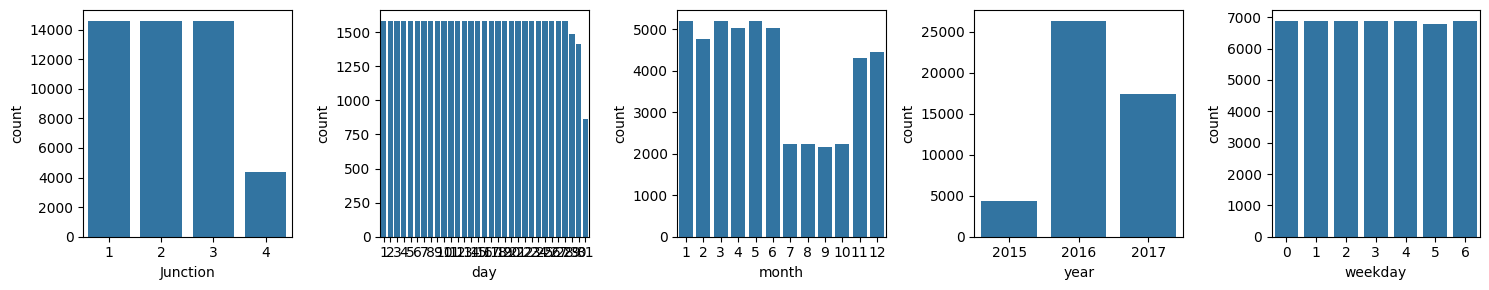

In [ ]:
fig, axes = plt.subplots(1, len(col_dis), figsize=(15, 3))
for i,col in enumerate(col_dis):
  sns.countplot(x=col, data=data,ax= axes[i])
plt.tight_layout()
plt.show()

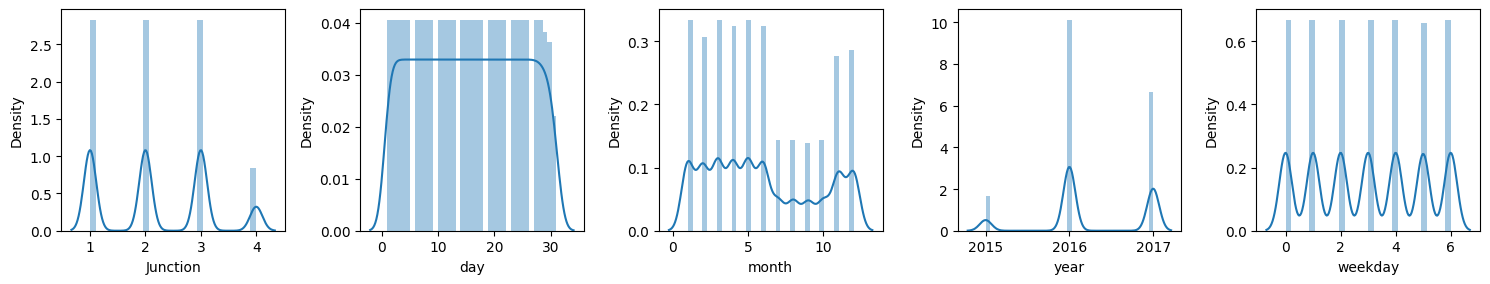

In [ ]:
fig, axes = plt.subplots(1, len(col_dis), figsize=(15, 3))
for i,col in enumerate(col_dis):
  sns.distplot(data[col],ax= axes[i])
plt.tight_layout()
plt.show()

##Multivariate Analysis

In [ ]:
from datetime import time

time_array = data['time']

# Function to generate labels for each hour range
def generate_hour_labels():
    labels = []
    for hour in range(24):
        start_time = f"{hour:02d}:01"
        end_time = f"{hour:02d}:59"
        labels.append(f"{start_time} - {end_time}")
    return labels

# Generate the hourly range labels
hour_labels = generate_hour_labels()

# Function to label time based on hourly ranges
def label_time(t):
    hour = t.hour
    return hour_labels[hour]

# Apply the labeling function to each time in the array
time_labels = np.array([label_time(t) for t in time_array])

print(time_labels)


['00:01 - 00:59' '01:01 - 01:59' '02:01 - 02:59' ... '21:01 - 21:59'
 '22:01 - 22:59' '23:01 - 23:59']


In [ ]:
data['time_label'] = time_labels

In [ ]:
data.select_dtypes(include = "int").corr()*100

,Junction,Vehicles,ID,day,month,year,weekday
Junction,100.000000,-61.378721,22.187558,-0.209462,-12.427707,22.129768,-0.065910
Vehicles,-61.378721,100.000000,22.797421,2.789498,-2.272345,22.125305,-12.602651
ID,22.187558,22.797421,100.000000,-0.571914,-58.609495,99.889582,0.113107
day,-0.209462,2.789498,-0.571914,100.000000,0.915476,-0.747478,-0.086289
month,-12.427707,-2.272345,-58.609495,0.915476,100.000000,-62.349566,-0.320822
year,22.129768,22.125305,99.889582,-0.747478,-62.349566,100.000000,0.127853
weekday,-0.065910,-12.602651,0.113107,-0.086289,-0.320822,0.127853,100.000000


<Axes: xlabel='Junction', ylabel='Vehicles'>

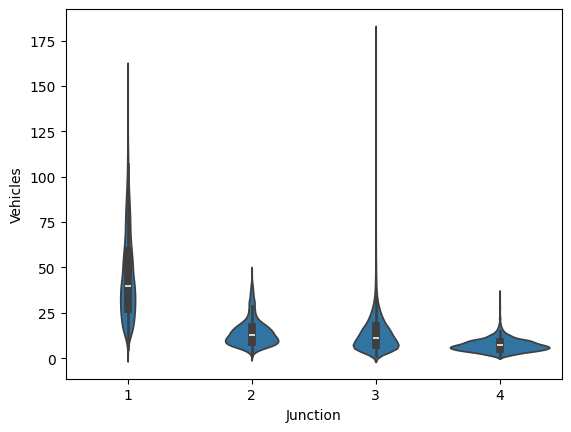

In [ ]:
sns.violinplot(x='Junction', y='Vehicles', data=data)

<Axes: >

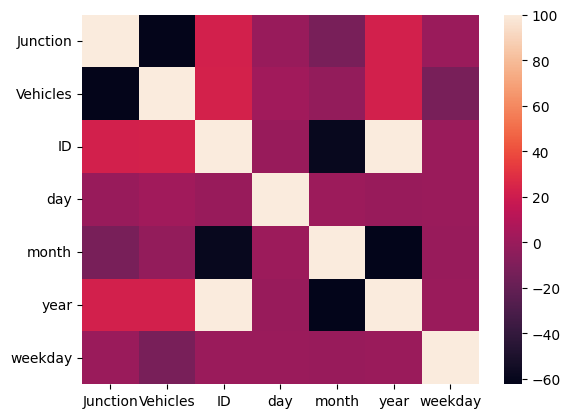

In [ ]:
sns.heatmap(data.select_dtypes(include = "int").corr()*100)

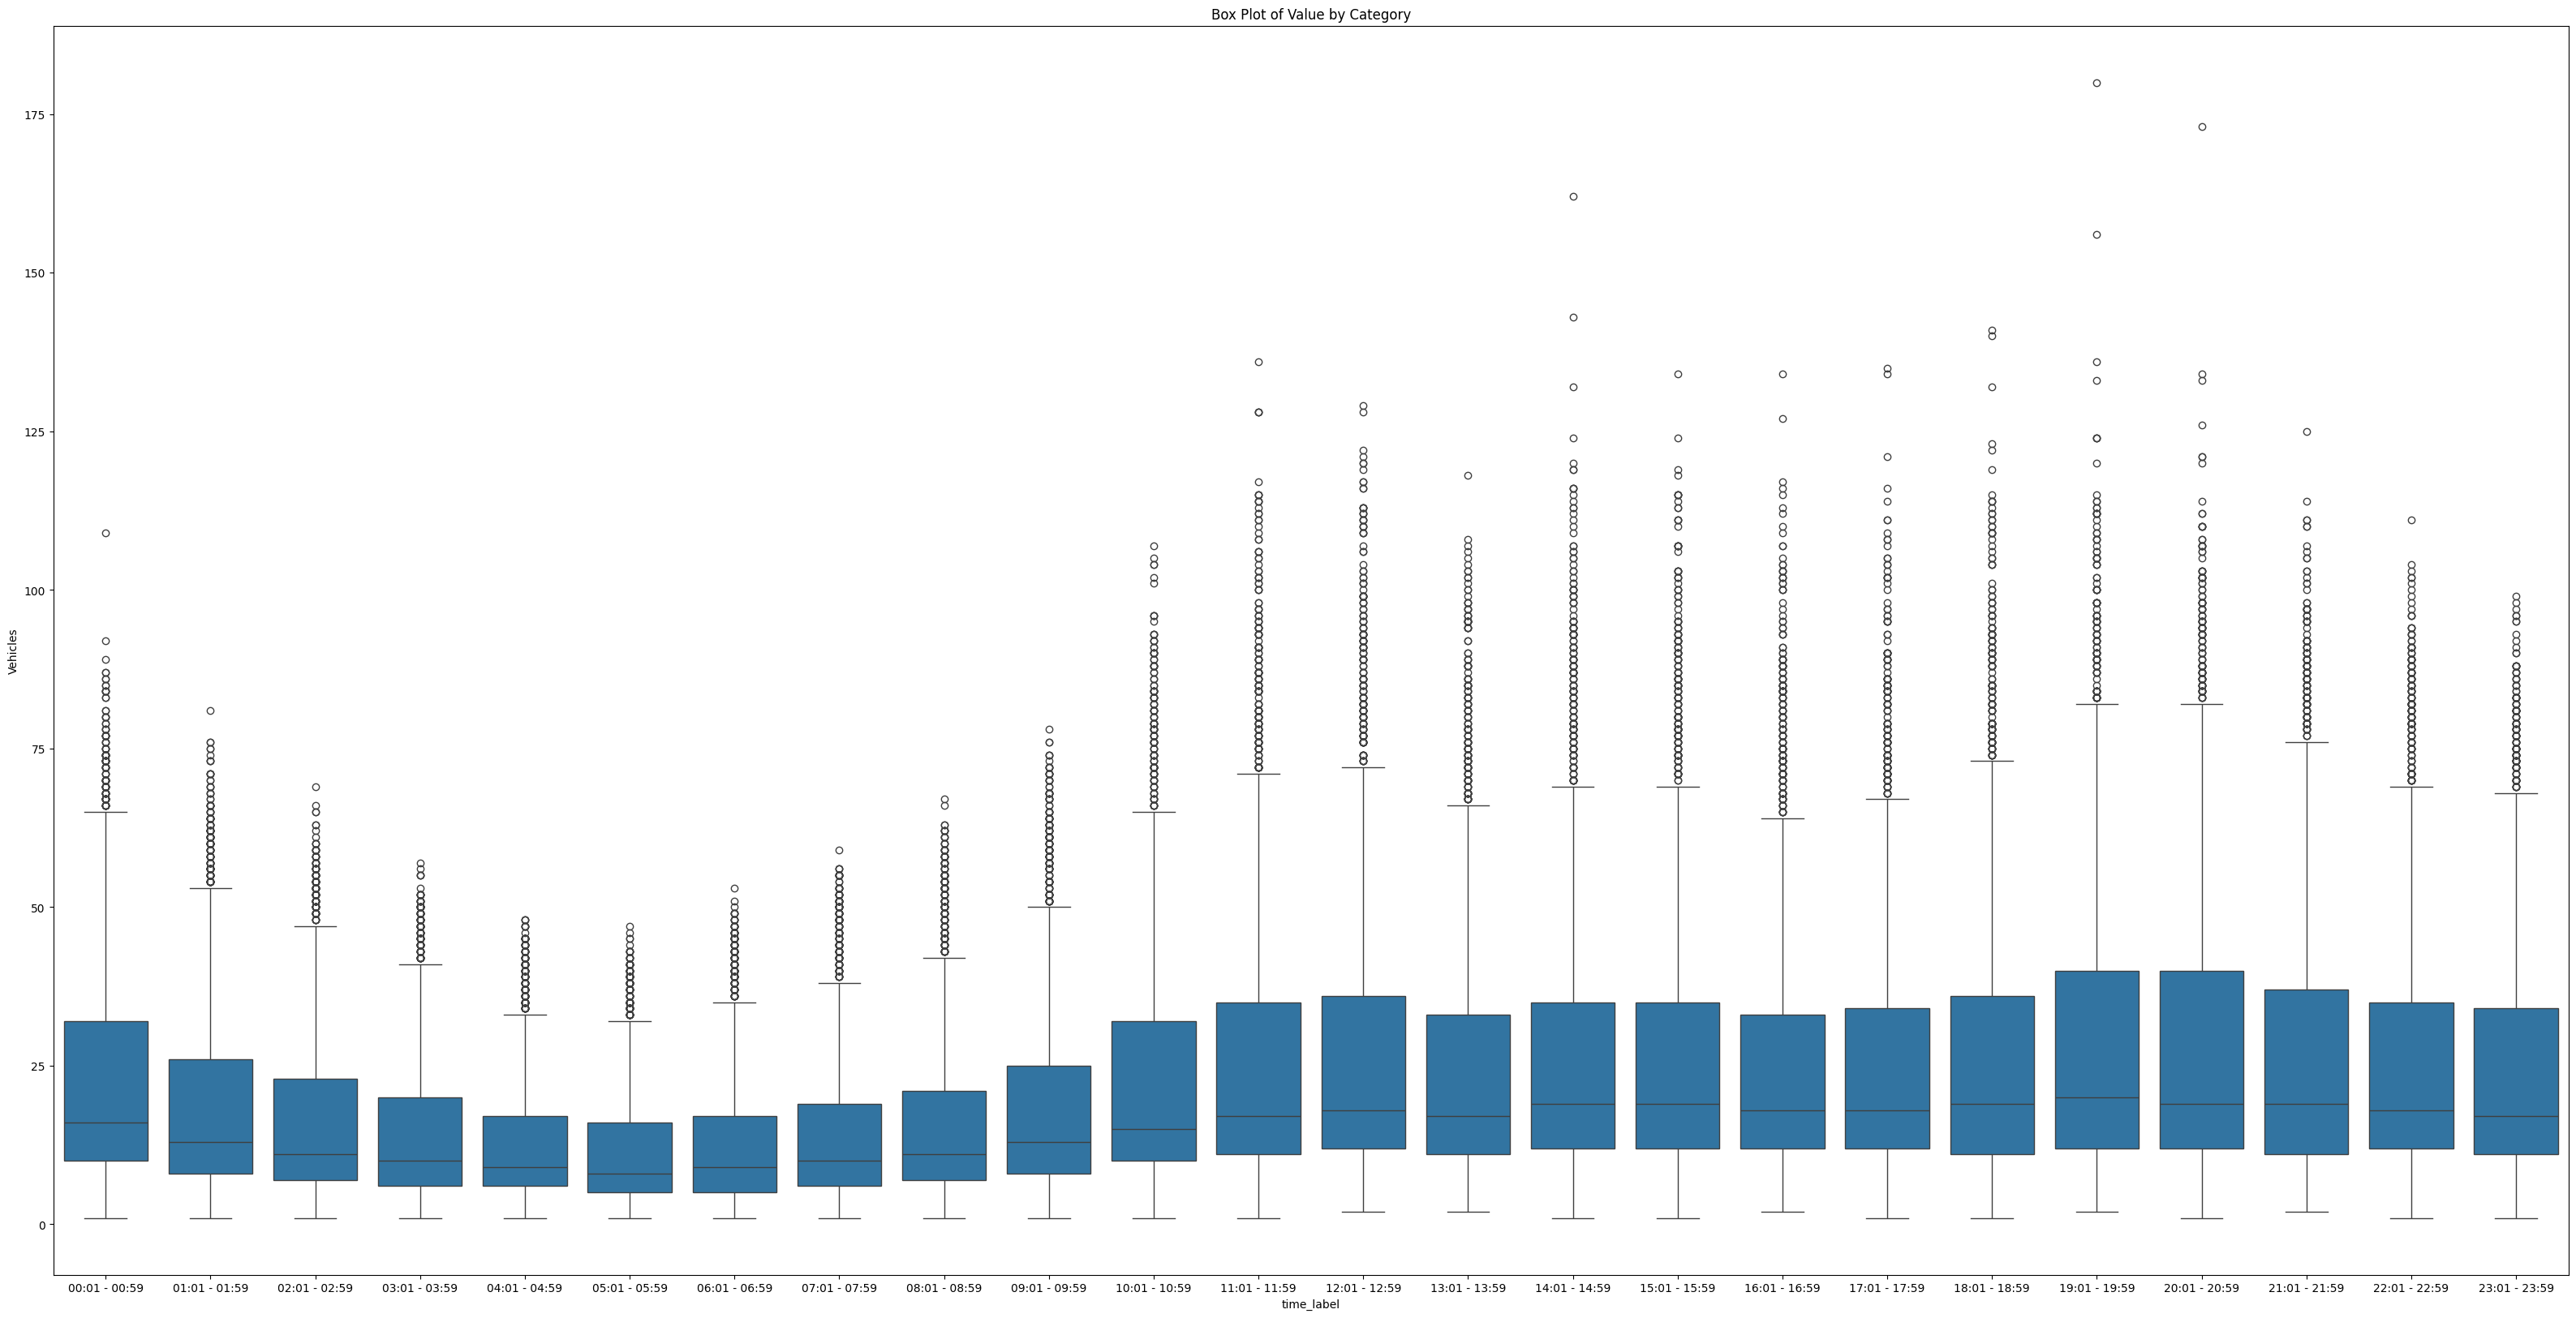

In [ ]:
plt.figure(figsize=(40, 20))
sns.boxplot(x='time_label', y='Vehicles', data=data)
plt.title('Box Plot of Value by Category')
plt.show()

In [ ]:
from scipy.stats import f_oneway

# Perform ANOVA
categories = data['Vehicles'].unique()
values_by_category = [data[data['Vehicles'] == category]['year'] for category in categories]
anova_result = f_oneway(*values_by_category)

print(f"ANOVA F-value: {anova_result.statistic}, p-value: {anova_result.pvalue}")


ANOVA F-value: 21.367260238678732, p-value: 0.0


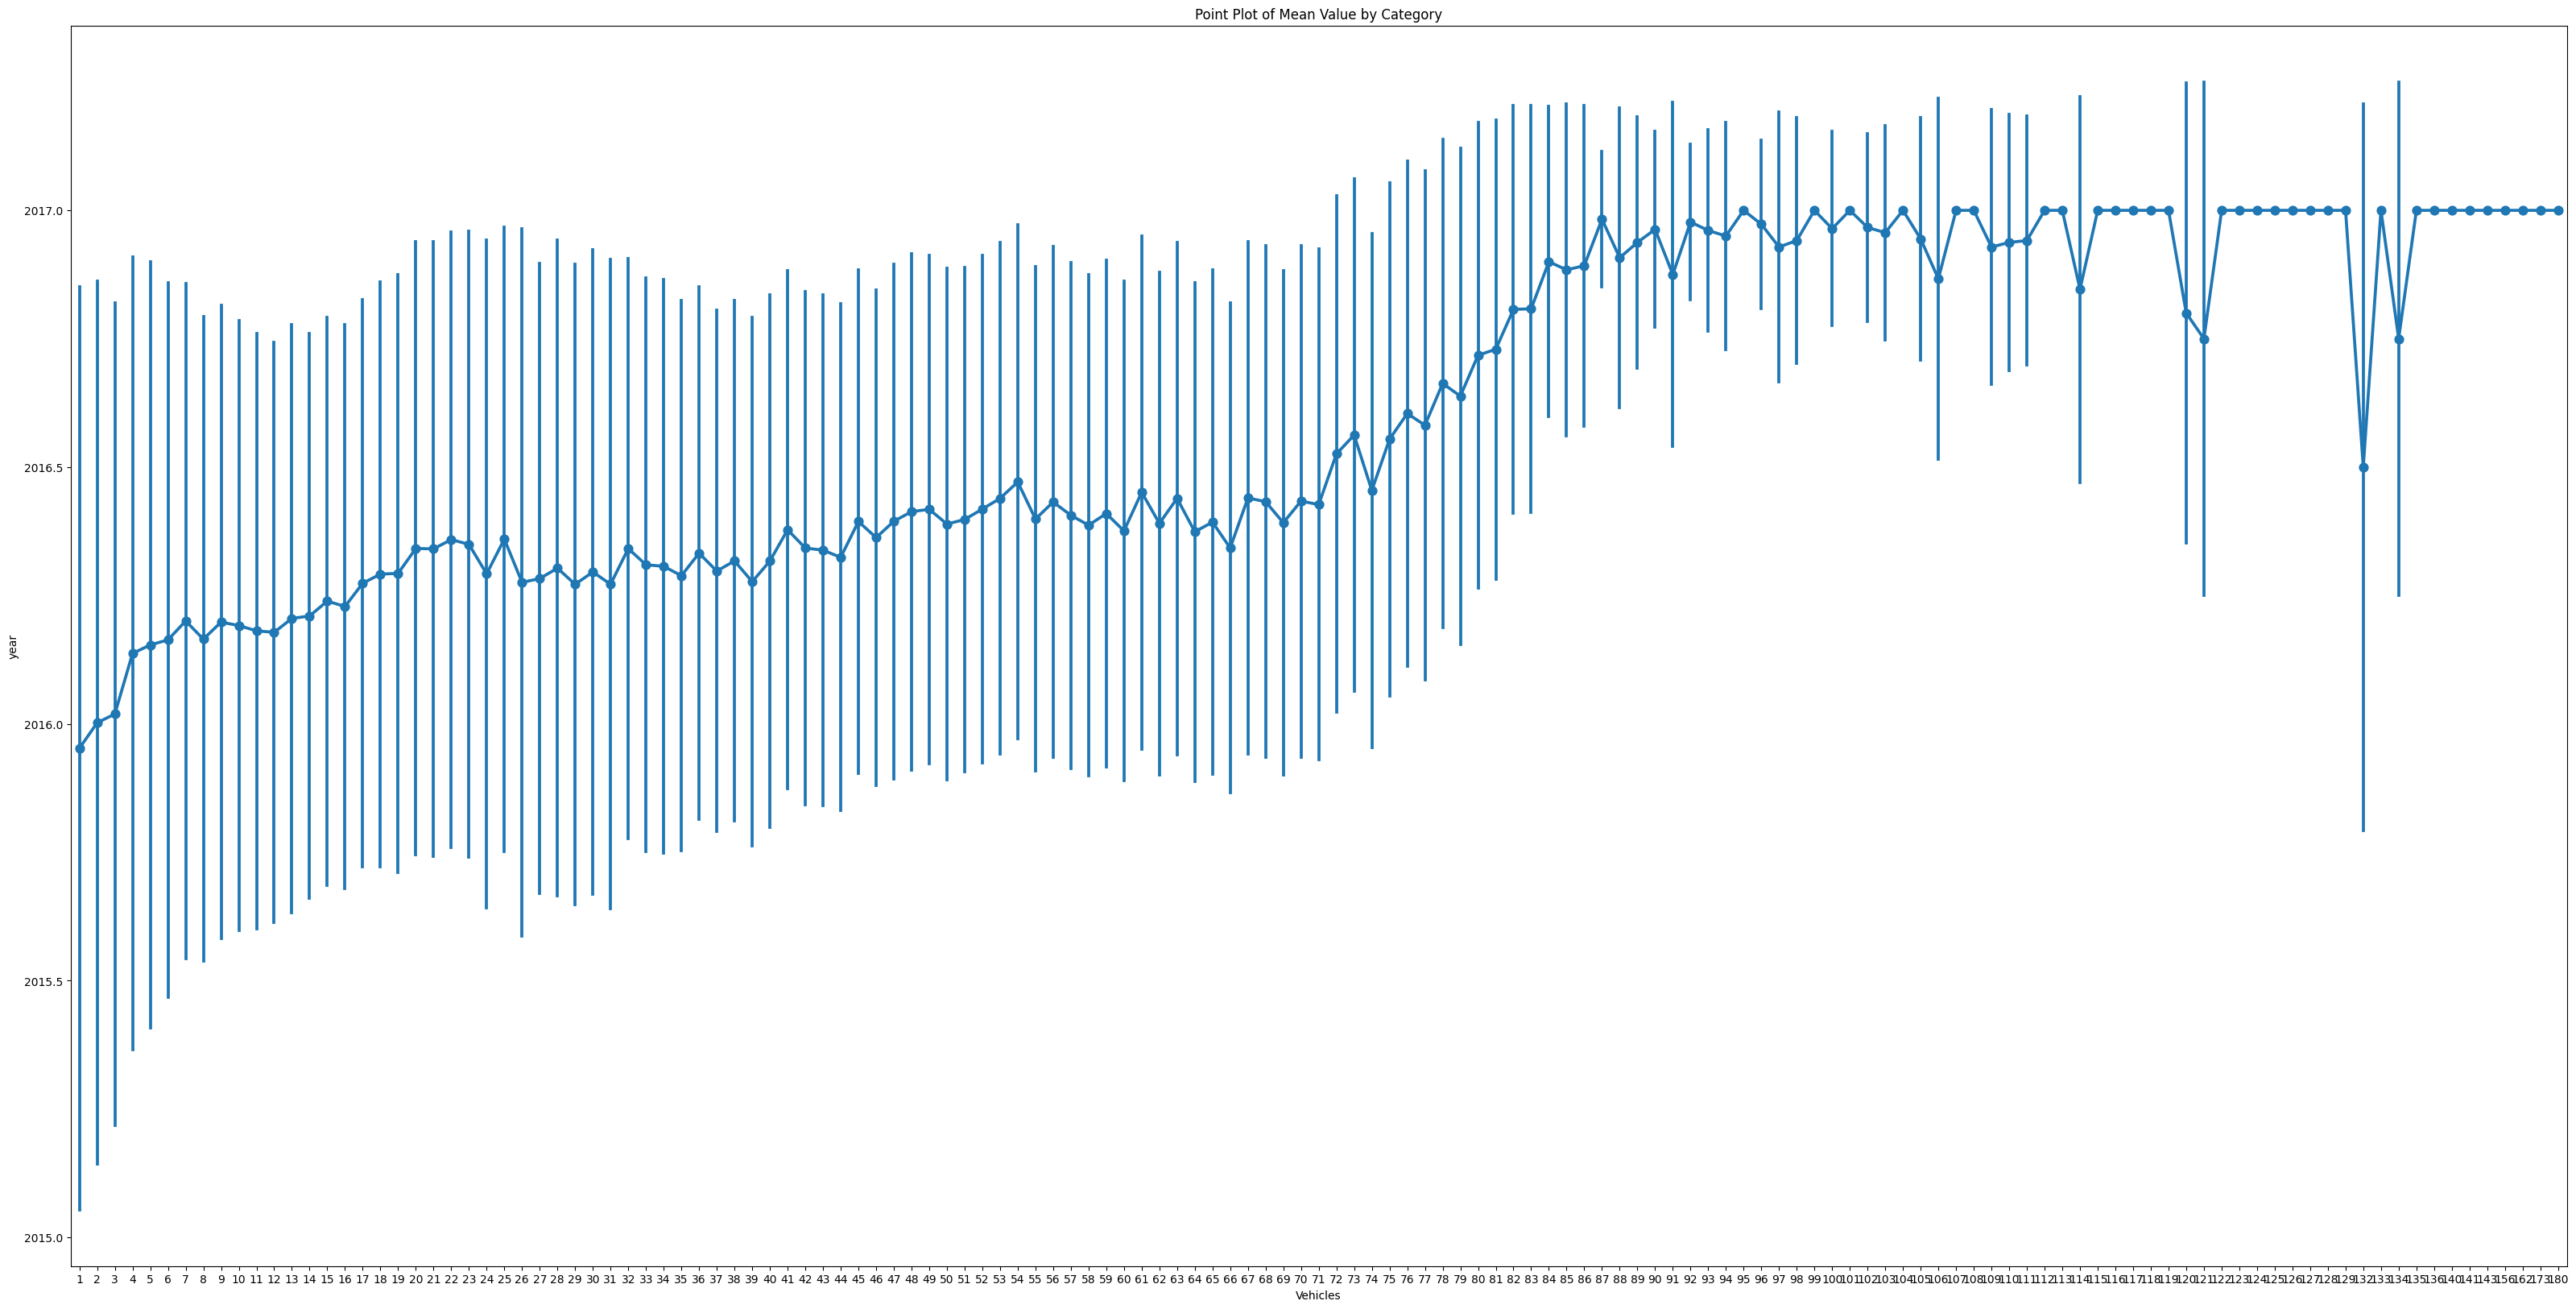

In [ ]:
plt.figure(figsize=(40, 20))
sns.pointplot(x='Vehicles', y='year', data=data, ci='sd')
plt.title('Point Plot of Mean Value by Category')
plt.show()